In [2]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

### Preconditionning std Laplacian with q=0.001

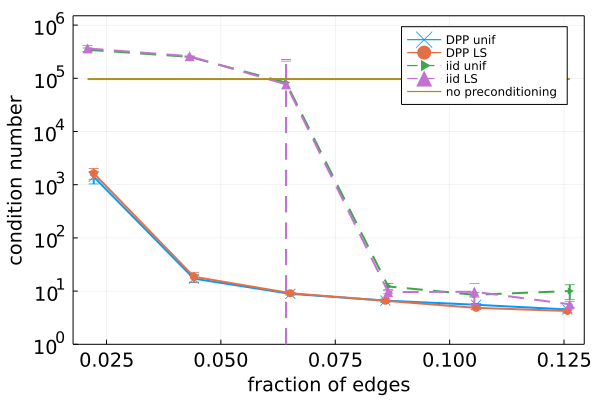

In [5]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()

meta_g = gen_graph_mun(rng, n, p, eta)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_tot = 6
n_rep = 3

D = cond_numbers(meta_g,q,n_tot,n_rep,rng)


x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,xlabel = "fraction of edges",
 yaxis=:log,
 labels = "DPP unif",
 markerstrokecolor=:auto,
 markershape=:xcross,
 markersize = 5,
 xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,labels = "no preconditioning",ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
linewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm,
markerstrokewidth=2)

ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])



In [4]:
foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### Preconditionning std Laplacian with q=0.1

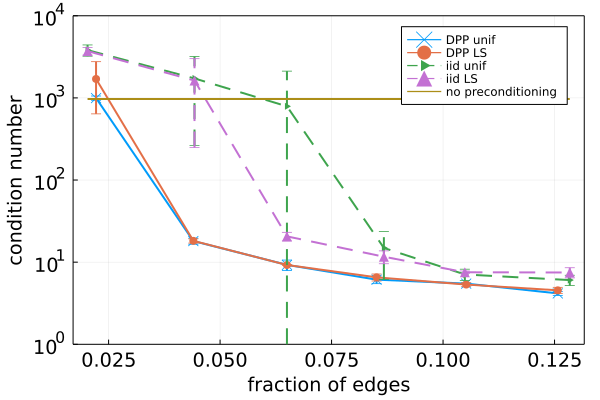

In [7]:
n = 100
p = 0.9
eta = 0.

mm = Length(:mm, 1)

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10, 
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)
ylims!((1e0,1e4))

In [6]:
foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

## Same graph but with non-trivial bundle

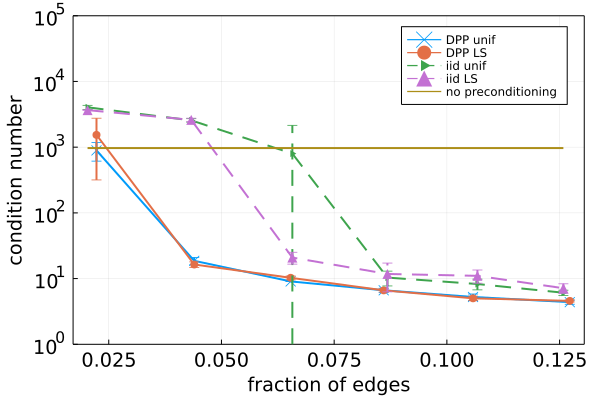

In [10]:
n = 100
p = 0.9
eta = 0.1

meta_g = gen_graph_mun(rng, n, p, eta);

q = 0.1;

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
width=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)

ylims!((1,1e5))

In [8]:
foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

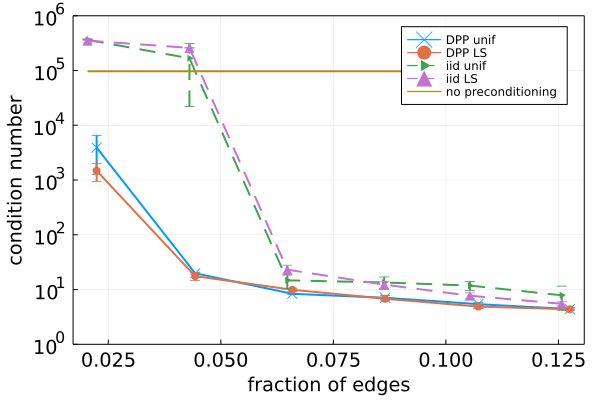

In [15]:

n = 100
p = 0.9
eta = 0.1

meta_g = gen_graph_mun(rng, n, p, eta);

q = 0.001;

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
width=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)

ylims!((1,1e6))

In [10]:
foldername = "figures/"
type = "precond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

### SBM

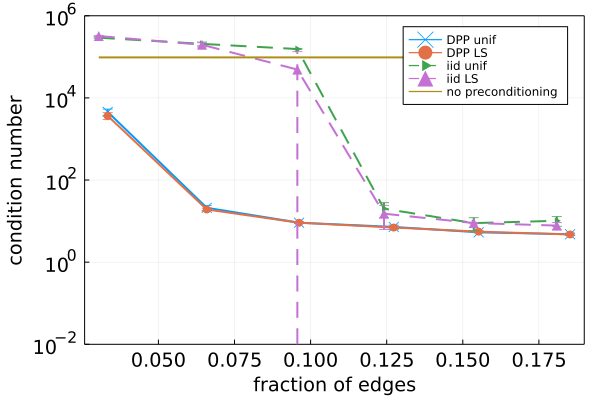

In [18]:

c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)


meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.001;
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
width=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)
ylims!((1e-2,1e6))


In [ ]:
foldername = "figures/"
type = "SBMprecond"
name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
savefig(foldername*name)

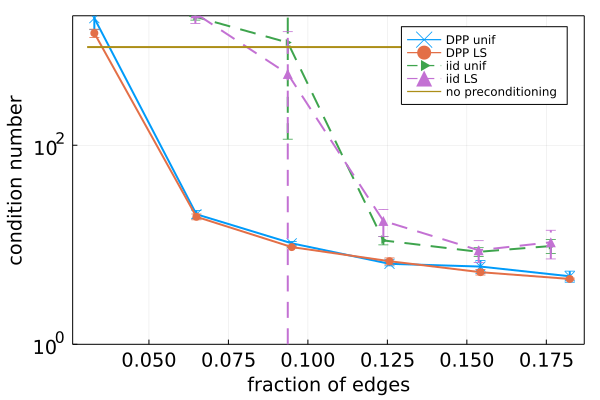

In [21]:

c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1;

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);


x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
width=2,
markerstrokewidth=2)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)

ylims!((1,2*1e3))

In [68]:
n_v = 10
g = complete_graph(n_v)
meta_g = MetaGraph(g, :angle, 0.0)


for e in edges(meta_g)
    θ = 2 * π * rand(rng)
    set_prop!(meta_g, e, :angle, θ)
end

# mtsf = cycle rooted spanning forest
q = 1
mtsf = multi_type_spanning_forest(rng, meta_g, q)
# get the roots
roots = get_prop(mtsf, :roots)
# get the nodes in the cycle(s)
cycles = get_prop(mtsf, :cycle_nodes)
# get the branches in the (reverse) order there were sampled
branches = get_prop(mtsf, :branches)

println("roots ", roots)
flt_branches = collect(Iterators.flatten(branches))
println("flt_branches ", flt_branches)
println("cycles ", cycles)
nb = isempty(cycles) ? 0 : sum(length(c) for c in cycles)
nb += length(roots)
nb += length(flt_branches)


roots [9]
flt_branches [6, 3, 5, 4, 8, 2]
cycles [[1, 10, 7]]


10

In [21]:
s = [1 3]
x = 1

x .== s

1×2 BitMatrix:
 1  0

In [23]:
x in s

true